In [2]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np

In [3]:
df_1 = pd.read_csv("homework_2.1.csv")
df_1.head()

,Unnamed: 0,time,G1,G2,G3
0,0,0,0.882026,1.441575,0.065409
1,1,1,0.210079,-0.163880,0.140310
2,2,2,0.509369,-0.115242,0.819830
3,3,3,1.150447,1.014698,0.607632
4,4,4,0.973779,-0.046562,0.610066


In [4]:
X = df_1[["time"]]
y = df_1["G1"]

lr = LinearRegression()
lr.fit(X, y)


print("G1 time coefficient:", lr.coef_[0])

G1 time coefficient: 0.008498349168608876


In [5]:
df_long = df_1.melt(id_vars=["time"], value_vars=["G1", "G2", "G3"],
                  var_name="group", value_name="outcome")


df_long = pd.get_dummies(df_long, columns=["group"], drop_first=False)

X = df_long[["time", "group_G1", "group_G2", "group_G3"]]
y = df_long["outcome"]


lr = LinearRegression()
lr.fit(X, y)

print("Time coefficient:", lr.coef_[0])

Time coefficient: 0.009017213376459327


In [6]:
df_2 = pd.read_csv("homework_2.2.csv")
df_2.head(10)

,Unnamed: 0,X,Y,Z
0,0,0,1.182435,-0.725820
1,1,0,2.714474,0.563476
2,2,0,0.077612,-0.435632
3,3,0,-0.154449,-0.104553
4,4,0,22.298992,-2.321273
5,5,0,-0.199007,-0.214094
6,6,0,2.563258,0.543405
7,7,1,3.369376,-0.537454
8,8,1,2.962496,-0.380275
9,9,0,0.883325,0.265473


In [7]:
np.random.seed(42)


n_bootstrap = 1000
bootstrap_effects = []

# Bootstrap sampling loop
for _ in range(n_bootstrap):
    sample = df_2.sample(frac=1, replace=True)  # resample with replacement
    treated_mean = sample[sample["X"] == 1]["Y"].mean()
    untreated_mean = sample[sample["X"] == 0]["Y"].mean()
    bootstrap_effects.append(treated_mean - untreated_mean)

# Compute statistics
bootstrap_mean = np.mean(bootstrap_effects)
lower_ci = np.percentile(bootstrap_effects, 2.5)
upper_ci = np.percentile(bootstrap_effects, 97.5)

# Print results
print("Bootstrap mean treatment effect:", bootstrap_mean)
print("95% Confidence Interval:", (lower_ci, upper_ci))

Bootstrap mean treatment effect: 2.9207891225431184
95% Confidence Interval: (np.float64(2.5782868881023484), np.float64(3.282700281917396))


In [ ]:
bootstrap_variance = np.var(bootstrap_effects, ddof=1) 
print("Bootstrap variance of treatment effect:", bootstrap_variance)


Bootstrap variance of treatment effect: 0.031233406175477617


In [9]:
from scipy.stats import skew

bootstrap_skewness = skew(bootstrap_effects)
print("Bootstrap skewness of treatment effect:", bootstrap_skewness)


Bootstrap skewness of treatment effect: 0.08723377108630882


Sample size: 10, Variance of mean: 0.148816
Sample size: 50, Variance of mean: 0.023656
Sample size: 100, Variance of mean: 0.017977
Sample size: 500, Variance of mean: 0.007589
Sample size: 1000, Variance of mean: 0.009107


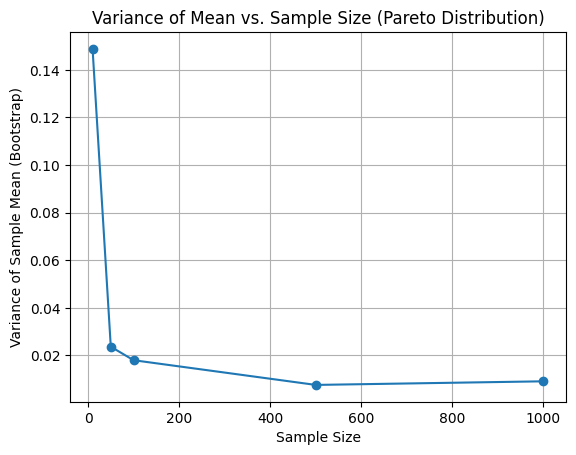

In [ ]:
# week 2 reflection
import matplotlib.pyplot as plt

def bootstrap_mean_variance(distribution_func, sample_size, n_bootstrap=1000, **dist_params):
    np.random.seed(0)
    full_sample = distribution_func(size=sample_size, **dist_params)
    
    bootstrap_means = []
    for _ in range(n_bootstrap):
        resample = np.random.choice(full_sample, size=sample_size, replace=True)
        bootstrap_means.append(np.mean(resample))

    return np.var(bootstrap_means, ddof=1)

sample_sizes = [10, 50, 100, 500, 1000]
variances = []

for n in sample_sizes:
    var = bootstrap_mean_variance(np.random.pareto, sample_size=n, a=2.0)  # Pareto shape parameter a > 1 for mean to exist
    variances.append(var)
    print(f"Sample size: {n}, Variance of mean: {var:.6f}")

# Plot the results
plt.plot(sample_sizes, variances, marker='o')
plt.xlabel('Sample Size')
plt.ylabel('Variance of Sample Mean (Bootstrap)')
plt.title('Variance of Mean vs. Sample Size (Pareto Distribution)')
plt.grid(True)
plt.show()
